<a href="https://colab.research.google.com/github/Cassi686/Cassi686/blob/main/Prev_streaming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 7.7 MB/s eta 0:00:00


In [ ]:
# Importando bibliotecas
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import scale, minmax_scale, power_transform
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score,accuracy_score
from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import GridSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from skopt.optimizer.dummy import dummy_minimize
from skopt import gp_minimize
from skopt.plots import plot_convergence





In [ ]:
#Dataframe
df = pd.read_csv('/content/streaming_data.csv')
df

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f
...,...,...,...,...,...,...,...,...,...,...
77879,45.0,Male,NaN,NaN,Basic,NaN,5,2.20,0.0,6b51fe0d-d4a1-41ed-a55c-d05f5c961e3c
77880,47.0,Female,6176.0,NaN,Premium,NaN,2,4.54,0.0,59d70167-6be0-474c-b71e-14153205b44f
77881,64.0,Female,NaN,5.0,Premium,NaN,1,4.34,1.0,a7d5ed26-78a4-4e70-bd04-0fec883e56aa
77882,58.0,Male,1314.0,5.0,Standard,NaN,4,NaN,0.0,472e9e70-87ca-4c5e-bfee-fa9f42b54f51


DATA UNDERSTAND

In [ ]:
# Tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [ ]:
# Descrição dos dados

df.describe()


,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [ ]:
# Removendo duplicatas

df.drop_duplicates()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f
...,...,...,...,...,...,...,...,...,...,...
65476,60.0,Female,6395.0,NaN,NaN,NaN,4,NaN,1.0,c22f5b98-2e2c-486d-a589-c6e07130e821
65477,NaN,Male,NaN,4.0,NaN,NaN,4,2.37,0.0,1d84261c-6e29-4cb7-9f18-9b12cd45b087
65478,41.0,Male,4654.0,3.0,NaN,NaN,4,NaN,1.0,d0543cfb-4bc4-4ea8-8508-7004675749bd
65479,42.0,Male,5835.0,5.0,Basic,NaN,1,1.18,0.0,06868b80-fd40-429d-93ad-b4b2338cbf0d


In [ ]:
# Verificando valores faltantes
df.isna().sum()

Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
User_id                       0
dtype: int64

In [ ]:
df.isna()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,False,False,False,False,False,True,False,True,False,False
1,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,True,False,True,True,False
4,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
77879,False,False,True,True,False,True,False,False,False,False
77880,False,False,False,True,False,True,False,False,False,False
77881,False,False,True,False,False,True,False,False,False,False
77882,False,False,False,False,False,True,False,True,False,False


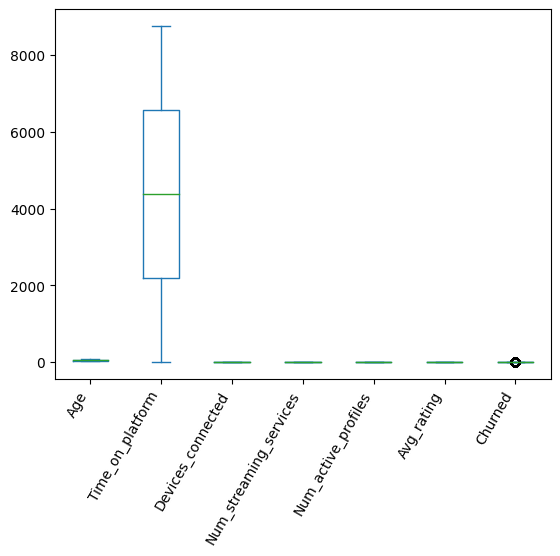

In [ ]:
#verificando outliers
df.plot.box()
plt.xticks(rotation=60, ha='right');

DATA PREPARATION

In [ ]:
# Retirando colunas com valores nulos

df.dropna(subset='Age', axis=0, inplace= True)
df.dropna(subset='Gender', axis=0, inplace=True)
df.dropna(subset='Subscription_type', axis=0, inplace=True)

In [ ]:
# Substituir NAN por zero

df.fillna(0, inplace=True)

In [ ]:
# Dropando coluna User_id

df.drop(columns='User_id', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36515 entries, 0 to 77883
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     36515 non-null  float64
 1   Gender                  36515 non-null  object 
 2   Time_on_platform        36515 non-null  float64
 3   Devices_connected       36515 non-null  float64
 4   Subscription_type       36515 non-null  object 
 5   Num_streaming_services  36515 non-null  float64
 6   Num_active_profiles     36515 non-null  int64  
 7   Avg_rating              36515 non-null  float64
 8   Churned                 36515 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 2.8+ MB


In [ ]:
from sklearn import preprocessing

# Transformando colunas categoricas em numéricas

cc= preprocessing.LabelEncoder()

cc.fit(df.Gender)
df.Gender = cc.transform(df.Gender)

cc.fit(df.Subscription_type)
df.Subscription_type = cc.transform(df.Subscription_type)

In [ ]:
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
0,49.0,1,4700.0,3.0,0,0.0,3,0.00,0.0
1,69.0,0,6107.0,2.0,2,0.0,1,2.14,0.0
2,44.0,1,6374.0,3.0,1,1.0,1,1.91,1.0
3,26.0,1,0.0,5.0,0,0.0,2,0.00,0.0
5,54.0,1,3024.0,2.0,0,0.0,1,0.00,0.0


In [ ]:
# Transformnado a coluna Churned em string

df['Churned'] = df['Churned'].astype(str)


# Substituição de valores da coluna Churned

df['Churned']=df['Churned'].replace('1.0', 'Yes')
df['Churned']=df['Churned'].replace('0.0', 'No')

In [ ]:
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
0,49.0,1,4700.0,3.0,0,0.0,3,0.00,No
1,69.0,0,6107.0,2.0,2,0.0,1,2.14,No
2,44.0,1,6374.0,3.0,1,1.0,1,1.91,Yes
3,26.0,1,0.0,5.0,0,0.0,2,0.00,No
5,54.0,1,3024.0,2.0,0,0.0,1,0.00,No


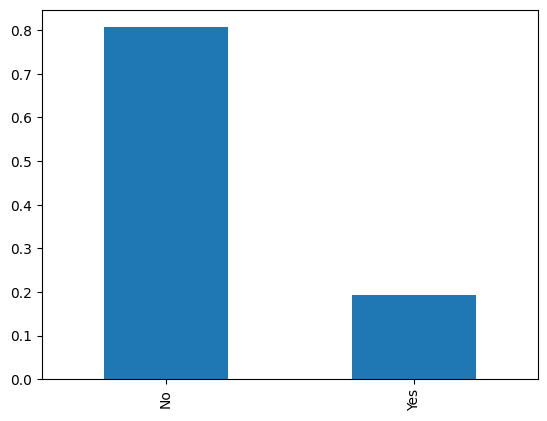

In [ ]:
df['Churned'].value_counts(normalize = True).plot(kind = 'bar');

Modelagem de dados - regressão logística

In [ ]:
# Dividindo o dataset em x e y(target)

x = df.drop(columns = 'Churned')

y = df['Churned']



In [ ]:
# Pre-processamento de x

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)

# Aplicando oversampling com SMOTE

OV = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = OV.fit_resample(X_scaled, y)

Testando modelos

In [ ]:
# Divisão dos dados em treino e teste

X_train, X_test, y_train, y_test = train_test_split(x_train_balanced, y_train_balanced, test_size=0.2, random_state=42)

In [ ]:

# Lista de modelos a serem testados

models= [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

# Dicionário para armazenar resultado

results={}

# Treinamento e teste para cada modelo

for name, model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  y_test_binary = np.where(y_test == 'Yes',1,0)
  y_pred_binary = np.where(y_pred == 'Yes',1,0)

  roc_auc = roc_auc_score(y_test_binary, y_pred_binary)
  accuracy = accuracy_score(y_test_binary, y_pred_binary)
  precision = precision_score(y_test_binary, y_pred_binary)
  recall = recall_score(y_test_binary, y_pred_binary)

  results[name] = {
      'ROC AUC': roc_auc,
      'Accuracy': accuracy,
      'Precision': precision,
      'Recall': recall
  }


# Imprimir os resultados

for name, metrics in results.items():
    print(f"--- {name} ---")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()


# O modelo de Random Forest mostrou os melhores resultados.

--- Logistic Regression ---
ROC AUC: 0.510076211770961
Accuracy: 0.5095892735913102
Precision: 0.5045266226791468
Recall: 0.5632065775950668

--- Decision Tree ---
ROC AUC: 0.7927352510380337
Accuracy: 0.7926849966055669
Precision: 0.7864978902953587
Recall: 0.7982185680027407

--- Random Forest ---
ROC AUC: 0.8804858664603562
Accuracy: 0.8806856754921928
Precision: 0.8961387200572042
Recall: 0.8586844809866393

--- Gradient Boosting ---
ROC AUC: 0.7333545589649083
Accuracy: 0.7352342158859471
Precision: 0.8939130434782608
Recall: 0.5282631038026722



Testando o melhor balanceamento de dataset

In [ ]:
# Divisão dos dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

# Opções de abordagem

approaches = ['No balancing', 'SMOTE', 'Undersampling', 'Combined']

# Resultados
results = {}

# Treinamento e teste para cada abordagem

for approaches in approaches:
    if approaches == 'No balancing':
      # treinamento sem balanceamento
      model = LogisticRegression(random_state=42)
      model.fit(x_train, y_train)
      y_pred = model.predict(x_test)
    elif approaches == 'SMOTE':
      # aplicando oversampling com SMOTE
      oversampler = SMOTE(random_state=42)
      x_train_balanced, y_train_balanced = oversampler.fit_resample(x_train, y_train)
      model = LogisticRegression(random_state=42)
      model.fit(x_train_balanced, y_train_balanced)
      y_pred = model.predict(x_test)
    elif approaches == 'Undersampling':
      # aplicando Undersampling
      undersampler = RandomUnderSampler(random_state=42)
      x_train_balanced, y_train_balanced = undersampler.fit_resample(x_train, y_train)
      model = LogisticRegression(random_state=42)
      model.fit(x_train_balanced, y_train_balanced)
      y_pred = model.predict(x_test)
    elif approaches == 'Combined':
      # aplicando SMOTE e understande combinados
         oversampler = SMOTE(random_state=42)
         x_train_balanced, y_train_balanced = oversampler.fit_resample(x_train, y_train)
         undersampler = RandomUnderSampler(random_state=42)
         x_train_balanced, y_train_balanced = undersampler.fit_resample(x_train_balanced, y_train_balanced)
         model = LogisticRegression(random_state=42)
         model.fit(x_train_balanced, y_train_balanced)
         y_pred = model.predict(x_test)
    else :

      continue

    y_test_binary = np.where(y_test == 'Yes',1,0)
    y_pred_binary = np.where(y_pred == 'Yes',1,0)
    # Calculo das métricas
    roc_auc = roc_auc_score(y_test_binary, y_pred_binary)
    accuracy = accuracy_score(y_test_binary, y_pred_binary)
    precision = precision_score(y_test_binary, y_pred_binary)
    recall = recall_score(y_test_binary, y_pred_binary)

    # Armazenamento dos resultados
    results[approaches]= {
        'ROC AUC': roc_auc,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall
    }

# Impressão dos resultados

for approach, metrics in results.items():
  print(f"--- {approach} ---")
  for metric, value in metrics.items():
      print(f"{metric}: {value}")
  print()

      # Sem balanceamento sofre inpacto do modelo. Acurácia superior a 80%, mas esta enviasado
      # métrica mais importante nesse cso é o ROC AUC pois observa aspectos gerais
      # O melhor balancemneto é no model SMOTE, por isso será usado no modelo

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


--- No balancing ---
ROC AUC: 0.5
Accuracy: 0.8078871696563056
Precision: 0.0
Recall: 0.0

--- SMOTE ---
ROC AUC: 0.5023316259347403
Accuracy: 0.5026701355607285
Precision: 0.1935661259279626
Recall: 0.5017818959372773

--- Undersampling ---
ROC AUC: 0.5032682991652271
Accuracy: 0.49979460495686706
Precision: 0.19412724306688417
Recall: 0.5089094796863863

--- Combined ---
ROC AUC: 0.5023316259347403
Accuracy: 0.5026701355607285
Precision: 0.1935661259279626
Recall: 0.5017818959372773



Aplicando Modelo

In [ ]:
# Aplicando oversampling com SMOTE
oversampler = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = oversampler.fit_resample(X_scaled, y)


In [ ]:
# Treino e teste
x_train, x_test, y_train, y_test = train_test_split(x_train_balanced, y_train_balanced, test_size = 0.2)

# Criando instância para regressão logística
model = LogisticRegression(random_state=42)

In [ ]:
# Treinando modelo
model.fit(x_train, y_train)

# predizendo valores
y_pred = model.predict(x_test)

In [ ]:
# Métricas de desempenho

#Transformando variáveis Yes ou NO em números
y_test = np.where(y_test == 'Yes',1,0)
y_pred = np.where(y_pred == 'Yes',1,0)

roc_auc = roc_auc_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print('roc_auc:',roc_auc)
print('accuracy:',accuracy)
print('precision:',precision)
print('recall:',recall)

# O modelo possui métricas ruins

roc_auc: 0.501626980305136
accuracy: 0.5011880515953836
precision: 0.5077796082738422
recall: 0.4652020794901895


Matriz de confusão:


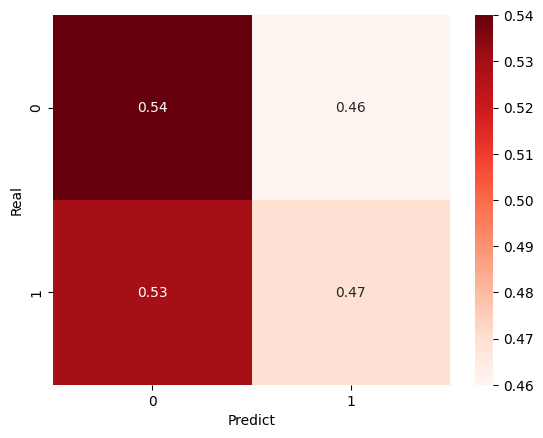

In [ ]:
# Calculando matriz confusão
confusion = confusion_matrix(y_test,y_pred)

# Calculando matriz normalizada
matriz_norm = np.round(confusion/np.sum(confusion,axis = 1).reshape(-1,1),2)

# Plotando matriz
print('Matriz de confusão:')

sns.heatmap(matriz_norm, cmap = 'Reds', annot = True)
plt.xlabel('Predict')
plt.ylabel('Real')
plt.show()

Tunning - Regressão logística


In [ ]:
# Definir parametros para ajustes

param_grid = {
    'C': [5.0,9.0],
    'penalty':['l1','l2'],
    'solver':['librinear','saga'],
    'max_iter':[100,200,500],
    'class_weight':[None, 'balanced']
}

# Criar o objeto GridSearchCV

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)

# Executar o GridSearch com todos os dados de treinamento
grid_search.fit(x_train, y_train)

# Imprimir os melhores hiperparâmetros encontrados
print('Melhores hiperparâmetros:')
print(grid_search.best_params_)

# Imprimir melhor pontuação(Score)
print('Melhor pontuação (accuracy):', grid_search.best_score_)



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/skl

Melhores hiperparâmetros:
{'C': 5.0, 'class_weight': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Melhor pontuação (accuracy): 0.5092501840727224


In [ ]:
y_train = np.where(y_train == 'Yes',1,0) # Transformnado valores Yes e No em 1 e 0

In [ ]:
model_tunned1 = LogisticRegression( C = 5.0, penalty = 'l2',solver='saga', class_weight='balanced' ,max_iter = 100)
model_tunned1.fit(x_train,y_train)

LogisticRegression(C=5.0, class_weight='balanced', solver='saga')

In [ ]:
print(y_train)

[0 0 0 ... 1 0 0]


In [ ]:
predict_tunned1 = model_tunned1.predict(x_test)
print(predict_tunned1)

[0 0 1 ... 1 0 1]


In [ ]:
print(y_test)

[0 0 1 ... 0 0 1]


Matriz de Confusão:


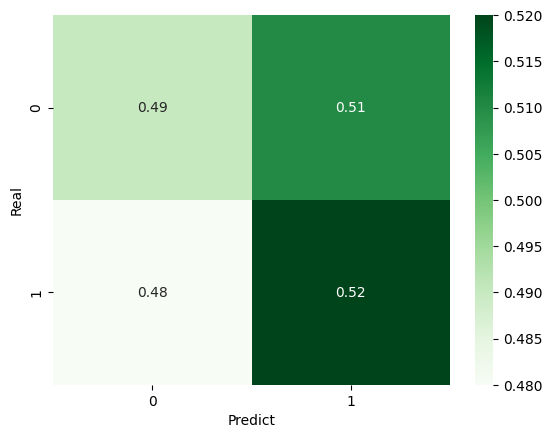

In [ ]:
# Calculando matriz confusão
confusion_tunned1 = confusion_matrix(y_test, predict_tunned1)

# Calculando Matriz normalizada
Matriz_norm_tunned1 = np.round(confusion_tunned1/np.sum(confusion_tunned1, axis = 1).reshape(-1,1),2)

# Plotando a matriz graficamente
print('Matriz de Confusão:')

sns.heatmap(Matriz_norm_tunned1, cmap = 'Greens', annot = True)
plt.xlabel('Predict')
plt.ylabel('Real')
plt.show()

In [ ]:
y_test_bin2 = y_test
y_pred_bin2 = predict_tunned1

In [ ]:
# Calculando a precisão
precision = precision_score(y_test_bin2,y_pred_bin2)
print('Precisão:',precision)

# Calculando Recall
recall = recall_score(y_test_bin2,y_pred_bin2)
print('Recall:',recall)

# calculando F1 score
f1 = f1_score(y_test_bin2, y_pred_bin2)
print('F1-Score:', f1)

# calculando auc roc
auc_roc = roc_auc_score(y_test_bin2, y_pred_bin2)
print('auc_roc:',auc_roc)


Precisão: 0.5108533554266778
Recall: 0.5170216334060037
F1-Score: 0.5139189864977497
auc_roc: 0.5049461370946872


Random Forest

In [ ]:
# Separando variáveis para treinar

x = df.drop(columns='Churned')
y = df['Churned']

In [ ]:
# Pre-processamento de x
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(x)

In [ ]:
# O Dataset está desbalanciado. Identificar obstáculo de balanceamento do modelo

# Divisão dos dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2, random_state=42)

# Opções de abordagem
approaches = ['No balancing', 'SMOTE', 'Undersampling', 'Combined']

# Resultados
results = {}

# Treinamento e avaliação para cada abordagem
for approach in approaches:
  if approach == 'No balancing':
    # Treinamento sem balanceamento
    model= RandomForestClassifier(random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict_proba(x_test)[:, 1]#Probabilidade da classe positiva
  elif approach == 'SMOTE':
    # Aplicando oversampling com SMOTE
    oversampler = SMOTE(random_state=42)
    x_train_balanced, y_train_balanced = oversampler.fit_resample(x_train,y_train)
    model = RandomForestClassifier(random_state= 42)
    model.fit(x_train_balanced, y_train_balanced)
    y_pred = model.predict_proba(x_test)[:, 1]#probabilidade da classe positiva
  elif approach == 'Undersampling':
    # Aplicando undersampling
    undersampler = RandomUnderSampler(random_state=42)
    x_train_balanced, y_train_balanced = undersampler.fit_resample(x_train, y_train)
    model = RandomForestClassifier(random_state=42)
    model .fit(x_train_balanced, y_train_balanced)
    y_pred = model.predict_proba(x_test)[:, 1]#probalidade da classe positiva
  elif approach == 'Combined':
    # aplicando SMOTE e undersampling combinados
    oversampler = SMOTE(random_state=42)
    x_train_balanced, y_train_balanced = oversampler.fit_resample(x_train, y_train)
    undersampler = RandomUnderSampler(random_state=42)
    x_train_balanced, y_train_balanced = undersampler.fit_resample(x_train_balanced, y_train_balanced)
    model = RandomForestClassifier(random_state=42)
    model.fit(x_train_balanced, y_train_balanced)
    y_pred = model.predict_proba(x_test)[:, 1]# Probabilidade da classe positiva
  else:
    continue

    # Cálculo das métricas
  y_true_numeric = np.where(y_test == 'Yes', 1,0)
  y_pred_numeric = np.round(y_pred) # Arredondar as provisões para obter valores numéricos

  roc_auc = roc_auc_score(y_true_numeric, y_pred_numeric)
  accuracy = accuracy_score(y_true_numeric, y_pred_numeric)
  precision = precision_score(y_true_numeric, y_pred_numeric, zero_division=0)
  recall = recall_score(y_true_numeric, y_pred_numeric, zero_division=0)

  # Armazenamento de resultados
  results[approach] = {
      'ROC AUC': roc_auc,
      'Accuracy': accuracy,
      'Precision': precision,
      'Recall': recall

  }

  # Impressão dos resultados
for approach, metrics in results.items():
    print(f"--- {approach} ---")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()


--- No balancing ---
ROC AUC: 0.6236876789446344
Accuracy: 0.8484184581678762
Precision: 0.8441860465116279
Recall: 0.2587312900926586

--- SMOTE ---
ROC AUC: 0.6256208850284499
Accuracy: 0.8006298781322744
Precision: 0.47378832838773494
Recall: 0.3414112615823236

--- Undersampling ---
ROC AUC: 0.6008732498157701
Accuracy: 0.5960564151718472
Precision: 0.2623655913978495
Recall: 0.6086956521739131

--- Combined ---
ROC AUC: 0.6231088345796537
Accuracy: 0.8000821580172531
Precision: 0.47147147147147145
Recall: 0.33570919458303633



A principal métrica que temos que avaliar é o ROC AUC porque se trata de uma métrica geral.

Caso nao houvesse o balanceamento, como existe uma grande disproporção entre os dados, a acurácia e precisão provavelmente iriam ser muito altos, pois se todos os valores previstos são iguais e os verdadeiros são 80% iguais, a acurácia é alta, mas o modelo esta envisesado. Portanto, será usado o SMOTE.

In [ ]:
# Aplicando oversampling com SMOTE
oversampler = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = oversampler.fit_resample(X_scaled, y)

In [ ]:
# Treino e teste
x_train, x_test, y_train, y_test = train_test_split(x_train_balanced, y_train_balanced, test_size = 0.2)


In [ ]:
# Criando instância
arvore = RandomForestClassifier()

# Treinando modelo
modelo = arvore.fit(x_train, y_train)

# Predizendo valores
y_pred = modelo.predict(x_test)

In [ ]:
# Métricas
accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, pos_label= 'Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')
# Iprimir métricas
print('Precisão:',precision)
print('Recall:',recall)
print('F1-score:',f1)

Precisão: 0.8982174688057041
Recall: 0.8463218004702721
F1-score: 0.87149775164303


O modelo tem valores bons. Devemos potencializá-lo para aumentar suas métricas.

Matriz confusão:


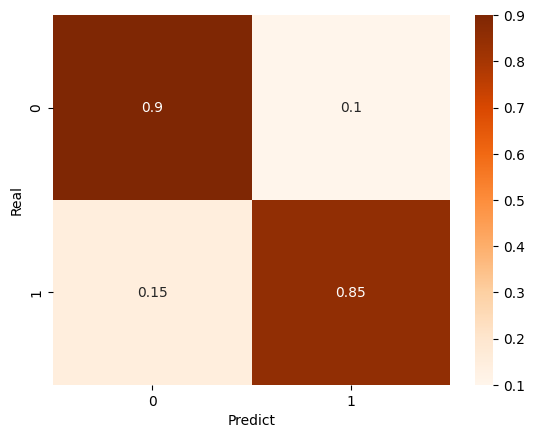

In [ ]:
# Calcular matriz confusão
confusao_three = confusion_matrix(y_test, y_pred)

# Calcular matriz normalizada
matriz_normalizada_three = np.round(confusao_three/np.sum(confusao_three, axis=1).reshape(-1,1),2)

# Plotando matriz confusão
print('Matriz confusão:')

sns.heatmap(matriz_normalizada_three, cmap='Oranges', annot=True)
plt.xlabel('Predict')
plt.ylabel('Real')
plt.show()

Tunning - Árvore de decisão

Encontrar melhor tunning para o modelo.

Pelo dummy minimize

In [ ]:
# Criando função de tunning para encontrar os melhores hiperparâmetros

def tunning(params):
  max_depth = params[0]
  min_samples_split = params[1]
  min_samples_leaf = params[2]
  max_features = params[3]
  n_estimators = params[4]

  model_tun = RandomForestClassifier(max_depth = max_depth, min_samples_split = min_samples_split,min_samples_leaf = min_samples_leaf, n_estimators = n_estimators )

  model_tun.fit(x_train, y_train)
  p = model_tun.predict_proba(x_test)[:, 1]
  return -roc_auc_score(y_test,p)
space = [(1,20),(2,10), (1,5), (1,x_train_balanced.shape[1]),(10,100)]

resultado = dummy_minimize(tunning,space,random_state=1, verbose = 1, n_calls = 30)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.8794
Function value obtained: -0.7869
Current minimum: -0.7869
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 6.1283
Function value obtained: -0.8780
Current minimum: -0.8780
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 2.1052
Function value obtained: -0.7274
Current minimum: -0.8780
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 1.9412
Function value obtained: -0.6922
Current minimum: -0.8780
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 5.4023
Function value obtained: -0.8475
Current minimum: -0.8780
Iteration No: 6 started. 

In [ ]:
best_params = resultado.x
best_score = -resultado.fun # Convertendo o valor negativo de volta para positivo

# Treinando o modelo com os melhores hiperparãmetros
model = RandomForestClassifier(max_depth = best_params[0], min_samples_split = best_params[1], min_samples_leaf = best_params[2], max_features = int(best_params[3]),n_estimators=best_params[4])

model.fit(x_train, y_train)

# Realizando previsões no conjunto de teste
y_pred = model.predict(x_test)

y_test_binary = np.where(y_test == 'Yes', 1, 0)
y_pred_binary = np.where(y_pred == 'Yes', 1, 0)

# Calculndo a métrica final( exemplo, ROC AUC)
metrica_final = roc_auc_score(y_test_binary, y_pred_binary)

# Prints
print('Melhores hiperparâmetros encontrados:',best_params)
print('Melhor pontuação (negativa):', resultado.fun)
print('Melhor pontuação (positiva):', best_score)
print('Métrica final:',metrica_final)


Melhores hiperparâmetros encontrados: [18, 10, 1, 6, 57]
Melhor pontuação (negativa): -0.8806562865329446
Melhor pontuação (positiva): 0.8806562865329446
Métrica final: 0.781012894166886


In [ ]:
resultado.x

[18, 10, 1, 6, 57]

In [ ]:
# Tunando com os parâmetros encontrados

arvore_tun_dummy = RandomForestClassifier(
    max_depth = 18,
    min_samples_split = 10,
    min_samples_leaf = 1,
    max_features = 6,
    n_estimators = 57
)

modelo_tunn1 = arvore_tun_dummy.fit(x_train, y_train)

y_pred_tunn1 = modelo_tunn1.predict(x_test)


accuracy = accuracy_score(y_test, y_pred_tunn1)
precision = precision_score(y_test, y_pred_tunn1, pos_label = 'Yes')
recall = recall_score(y_test, y_pred_tunn1, pos_label = 'Yes')
f1 = f1_score(y_test, y_pred_tunn1, pos_label = 'Yes')
# Imprimir as métricas

print('Acurácia:',accuracy)
print('Precisão:', precision)
print('Recall:',recall)
print('F1_Sscore:',f1)

Acurácia: 0.8060081466395111
Precisão: 0.8720081135902636
Recall: 0.7220356063150823
F1_Sscore: 0.7899669239250275


GP Minimize

In [ ]:
# Aplicando função tunning ao GP minimize
resultado_gp = gp_minimize(tunning,space,random_state = 1,verbose = 1, n_calls = 30, n_random_starts = 15)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 2.2420
Function value obtained: -0.8902
Current minimum: -0.8902
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 3.6312
Function value obtained: -0.7509
Current minimum: -0.8902
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 2.8137
Function value obtained: -0.7292
Current minimum: -0.8902
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 5.1712
Function value obtained: -0.8830
Current minimum: -0.8902
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 6.6283
Function value obtained: -0.8563
Current minimum: -0.8902
Iteration No: 6 started. 

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Iteration No: 28 ended. Search finished for the next optimal point.
Time taken: 7.0140
Function value obtained: -0.9104
Current minimum: -0.9119
Iteration No: 29 started. Searching for the next optimal point.
Iteration No: 29 ended. Search finished for the next optimal point.
Time taken: 7.2131
Function value obtained: -0.9094
Current minimum: -0.9119
Iteration No: 30 started. Searching for the next optimal point.
Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 4.8689
Function value obtained: -0.8783
Current minimum: -0.9119


In [ ]:
resultado_gp.x

[20, 2, 1, 8, 78]

In [ ]:
# Usando parãmetros encontrados

arvore_tun_gp = RandomForestClassifier(
    max_depth = 20,
    min_samples_split= 2,
    min_samples_leaf= 1,
    max_features = 8,
    n_estimators = 78
)

modelo_tunn2 = arvore_tun_gp.fit(x_train,y_train)

y_pred_tunn2 = modelo_tunn2.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_tunn2)
precision = precision_score(y_test, y_pred_tunn2, pos_label = 'Yes')
recall = recall_score(y_test, y_pred_tunn2, pos_label = 'Yes')
f1 = f1_score(y_test, y_pred_tunn2, pos_label = 'Yes')

# Imprimir as métricas
print('Acurácia:',accuracy)
print('Precisão:',precision)
print('Recall:',recall)
print('F1-score:',f1)


Acurácia: 0.8530210454854039
Precisão: 0.8809094189823169
Recall: 0.8199529727914008
F1-score: 0.849338900487126


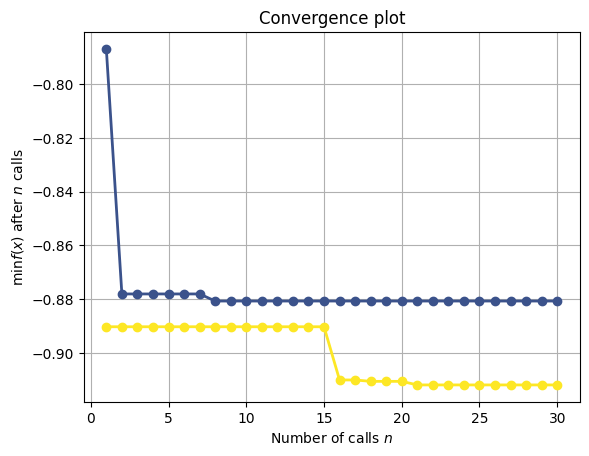

In [ ]:
# Plotando como os tunning de parâmetros aprenderem a melhorar o modelo
plot_convergence(resultado, resultado_gp);

Bayesian optimize

In [ ]:
# Definindo a função objetivo para a otimização bayesiana

def objective_function(max_depth, min_samples_split, min_samples_leaf, max_features, criterion):
    model = RandomForestClassifier(max_depth=max_depth,
                                   min_samples_split=min_samples_split,
                                   min_samples_leaf=min_samples_leaf,
                                   max_features=int(max_features),
                                   n_estimators=n_estimators)

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)

    return -accuracy # Negativo para maximizar a acurácia

    # Definindo limites de hiperparâmetros para otimização

param_space = {
    'max_depth':Integer(3,20),
    'min_samples_split':Integer(2,10),
    'min_samples_leaf':Integer(1,5),
    'max_features':Integer(1, x_train_balanced.shape[1]),
    'n_estimators':Integer(10,100)
}

# Criando uma instância do estimador

estimator = RandomForestClassifier()

In [ ]:
opt = BayesSearchCV(estimator, param_space, n_iter=50)

In [ ]:
# Executando a otimização
opt.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.10/dist

BayesSearchCV(estimator=RandomForestClassifier(),
              search_spaces={'max_depth': Integer(low=3, high=20, prior='uniform', transform='normalize'),
                             'max_features': Integer(low=1, high=8, prior='uniform', transform='normalize'),
                             'min_samples_leaf': Integer(low=1, high=5, prior='uniform', transform='normalize'),
                             'min_samples_split': Integer(low=2, high=10, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=10, high=100, prior='uniform', transform='normalize')})

In [ ]:
# Realizar previsões no conjunto teste
y_pred_tunned = opt.predict(x_test)

# Calcular as métricas
accuracy = accuracy_score(y_test, y_pred_tunned)
precision = precision_score(y_test, y_pred_tunned, pos_label = 'Yes')
recall = recall_score(y_test, y_pred_tunned, pos_label = 'Yes')
f1= f1_score(y_test, y_pred_tunned, pos_label = 'Yes')

# Imprimir métricas

print('Acurácia:',accuracy)
print('Precisão:',precision)
print('Recall:',recall)
print('F1_score:',f1)

Acurácia: 0.8542939579090292
Precisão: 0.8760873424462986
Recall: 0.8288545515619752
F1_score: 0.8518166911193579


Grid Search

In [ ]:
# Definir parâmetros para ajustes

param_grid={
    'n_estimators': (90,100),
    'max_depth': [18,20],
    'min_samples_split': [1,5],
    'min_samples_leaf': [1,5],
    'max_features': (1, x_train_balanced.shape[1])
}
modelo = RandomForestClassifier()
# Criar o objeto GridSearchCV
grid_search2 = GridSearchCV(modelo, param_grid,scoring = 'accuracy', cv=5 )

In [ ]:
# Executar o Grid Search com os dados de treinamento
grid_search2.fit(x_train, y_train)

# Obter o melhor modelo
best_model = grid_search2.best_estimator_

# Fazer previsões no conjunto de teste usando o melhor modelo

y_pred_tun = best_model.predict(x_test)

# calcular a acurácia do modelo ajustado

accuracy = accuracy_score(y_test, y_pred_tun)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

In [ ]:
# Imprimir os melhores hiperparâmetros encontrados

print('Melhores Hiperparâmetros:')
print(grid_search2.best_params_)

# Imprimir melhor acurácia(Pontuação)

print('Melhor acurácia(pontuação):',grid_search2.best_score_)

# Imprimir a acurácia do modelo ajustado no conjunto de teste

print('Acurácia de modelo ajustado:',accuracy)

In [ ]:
grid_search2.best_estimator_.get_params()

In [ ]:
arvore_tunned2 = RandomForestClassifier(ccp_alpha = 0.0,
 bootstrap = True,
 class_weight = None,
 max_depth = 20,
 max_features = 1,
 max_leaf_nodes = None,
 max_samples = None,
 min_samples_leaf = 1,
 min_samples_split = 5,
 min_weight_fraction_leaf = 0.0,
 n_estimators = 100,
 n_jobs = None,
 oob_score = False,
 random_state = None,
verbose = 0,
 warm_start = False)

In [ ]:
arvore_tunned2.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, max_features=1, min_samples_split=5)

In [ ]:
y_pred_tunned2 = arvore_tunned2.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_tunned2)
precision = precision_score(y_test, y_pred_tunned2, pos_label = 'Yes')
recall = recall_score(y_test, y_pred_tunned2, pos_label = 'Yes')
f1 = f1_score(y_test, y_pred_tunned2, pos_label = 'Yes')
# Imprimir as métricas
print("Acurácia:", accuracy)
print("Precisão:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Acurácia: 0.8430923285811269
Precisão: 0.8724369442932317
Recall: 0.8075243533758818
F1-score: 0.8387265590928915


Matriz confusão:


Text(50.722222222222214, 0.5, 'Real')

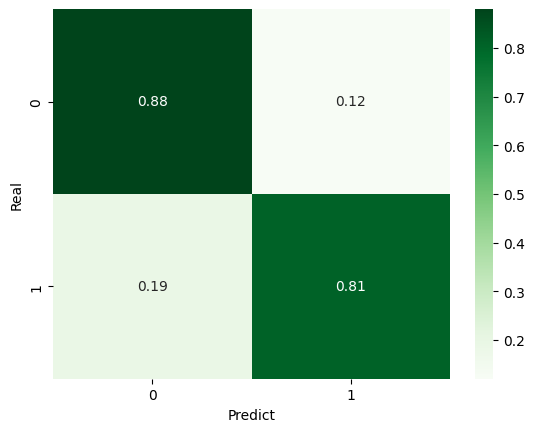

In [ ]:
# calculando Matriz confusão

confusao_tree_tun = confusion_matrix(y_test,y_pred_tunned2)

# calculando matriz normlizada
matriz_normalizada_tree_tun = np.round(confusao_tree_tun/np.sum(confusao_tree_tun,axis = 1).reshape(-1,1),2)

#Plotando matriz graficamente
print('Matriz confusão:')

sns.heatmap(matriz_normalizada_tree_tun,cmap='Greens', annot = True)
plt.xlabel('Predict')
plt.ylabel('Real')

Conclusão:

Aparentemente o melhor modelo de Random Forest é o padrão. Todos os Tunning geraram acurácias e métricas menore que o modelo padrão.

Ainda sim, a diferença exorbitante entre as métricas de random forest e Regressão Logistica podem ser explicadas por alguns motivos.

Um deles, é que o dataset é desbalanceado,e, modelos como o Linear Regression são punidos de forma muito mais grave do que random forest.